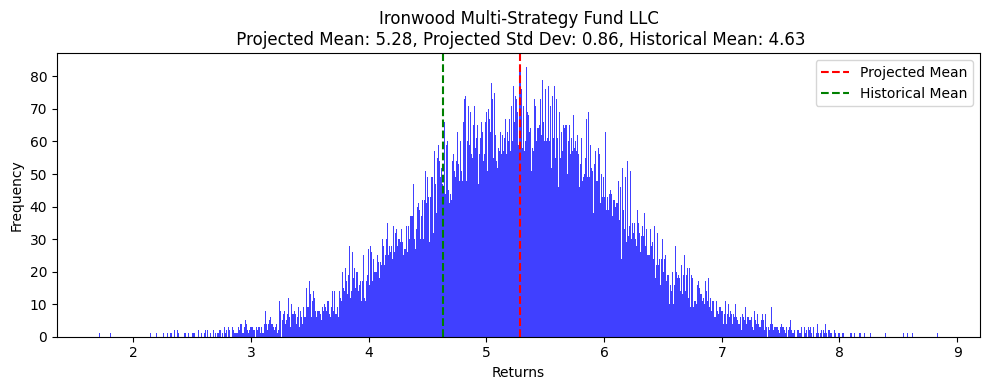

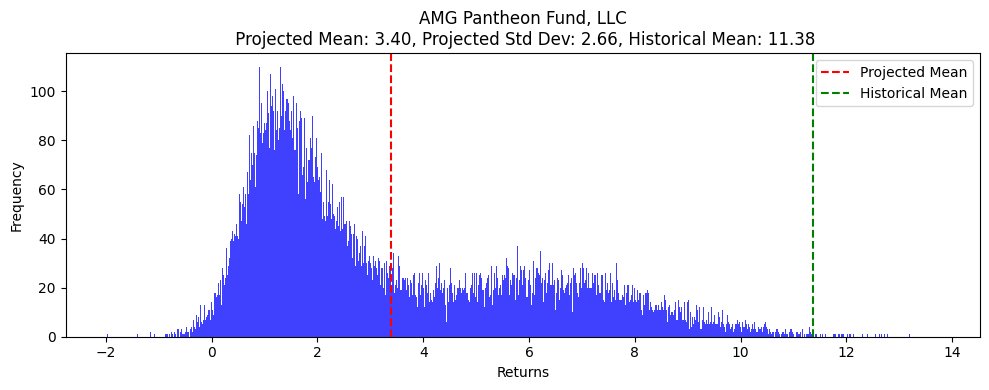

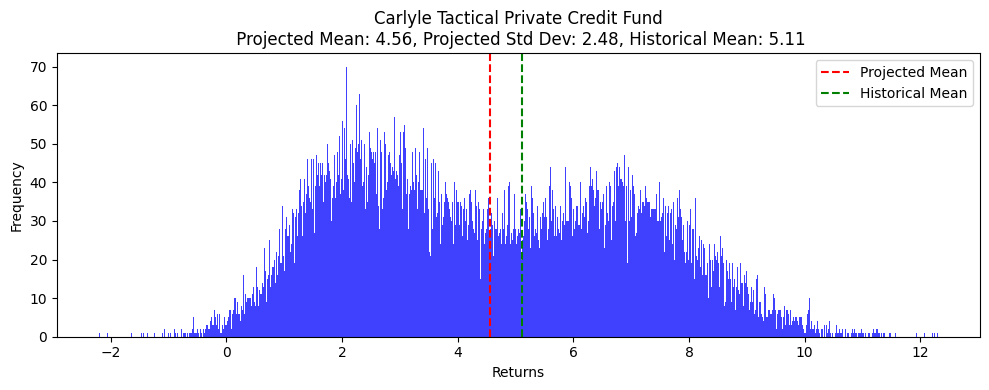

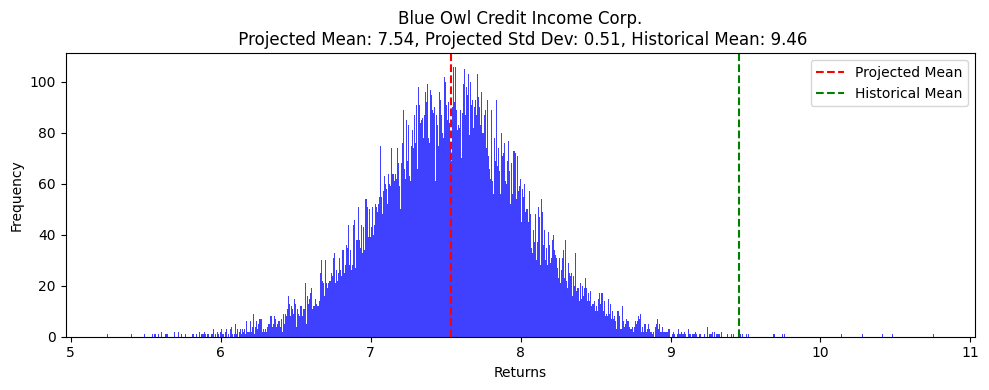

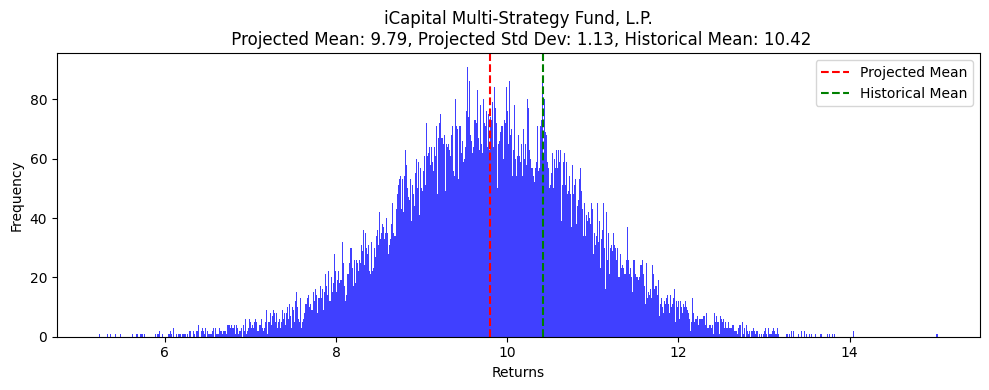

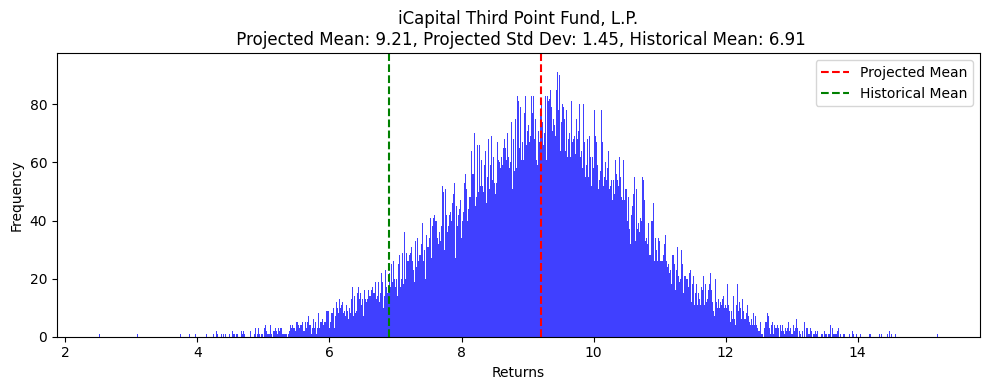

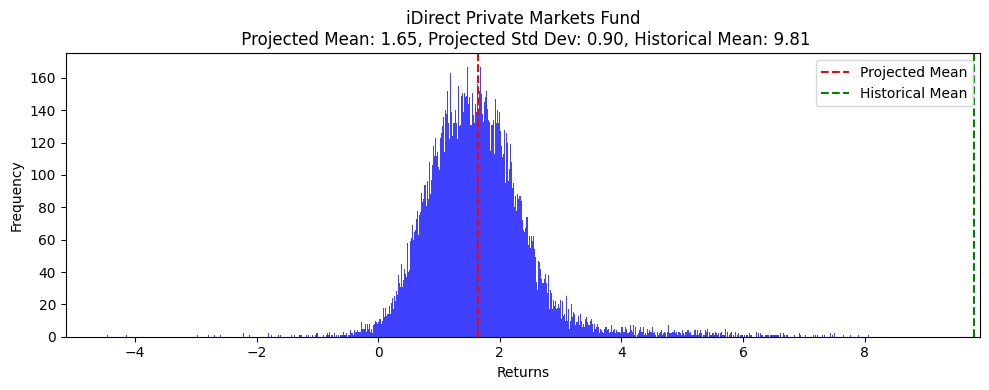

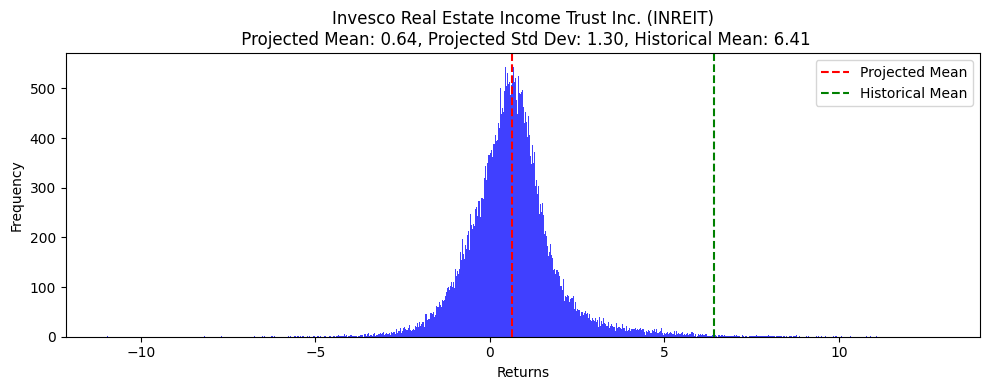

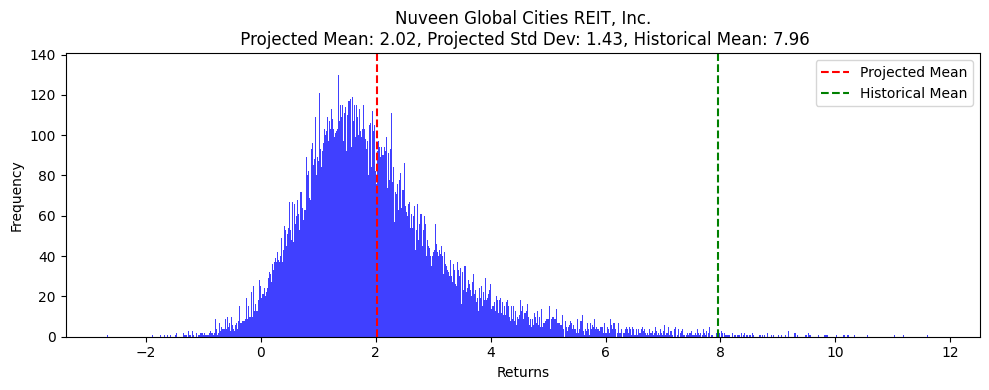

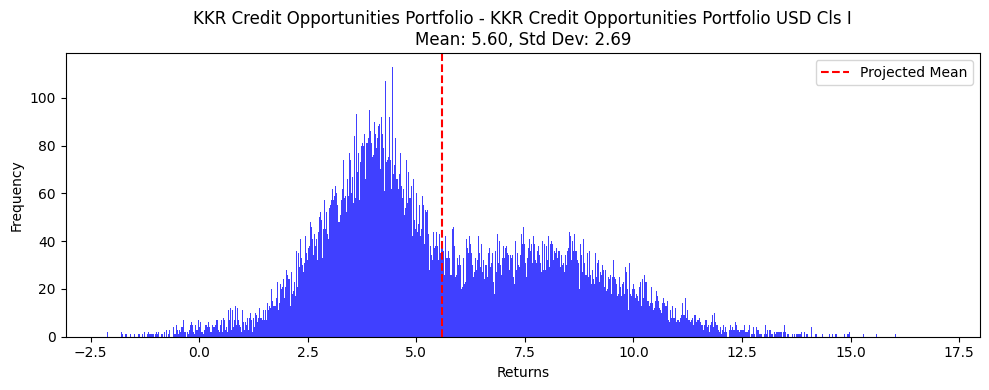

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the uploaded file
file_path = '/Users/asheth/Library/CloudStorage/OneDrive-iCapitalNetwork/Git/FactorPrediction/PNCI/Aniket/pnci_projected_return_dist_20240724.csv'
fund_returns = pd.read_csv(file_path)

# Dropping the first unnamed column and the last row
fund_returns = fund_returns.drop(columns=['Unnamed: 0'])

# Historical returns (manually re-entered since the file was not accessible)
historical_returns_dict = {
    'Ironwood Multi-Strategy Fund LLC': 4.630412,
    'AMG Pantheon Fund, LLC': 11.376003,
    'Carlyle Tactical Private Credit Fund': 5.113304,
    'Blue Owl Credit Income Corp.': 9.456549,
    'iCapital Multi-Strategy Fund, L.P.': 10.421439,
    'iCapital Third Point Fund, L.P.': 6.906217,
    'iDirect Private Markets Fund': 9.807358,
    'Invesco Real Estate Income Trust Inc. (INREIT)': 6.405194,
    'iCapital-WorldQuant Millennium SEALS, L.P.': 5.325400,
    'Nuveen Global Cities REIT, Inc.': 7.960824,
    'Blue Owl Real Estate Net Lease Trust': 6.660139,
    'KKR Credit Opportunities Portfolio — KKR Credit Opportunities Portfolio USD Cls I': 7.299070
}

# Preparing to plot individual histograms for each fund
num_bins = 1000

for column in fund_returns.columns:
    data = fund_returns[column]
    mean = data.mean()
    std_dev = data.std()
    historical_mean = historical_returns_dict.get(column, None)
    
    # Creating a new figure for each fund
    plt.figure(figsize=(10, 4))
    plt.hist(data, bins=num_bins, alpha=0.75, color='blue')
    plt.axvline(mean, color='red', linestyle='--', label='Projected Mean')
    if historical_mean is not None:
        plt.axvline(historical_mean, color='green', linestyle='--', label='Historical Mean')
        title = f'{column}\n Projected Mean: {mean:.2f}, Projected Std Dev: {std_dev:.2f}, Historical Mean: {historical_mean:.2f}'
    else:
        title = f'{column}\nMean: {mean:.2f}, Std Dev: {std_dev:.2f}'
    plt.title(title)
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

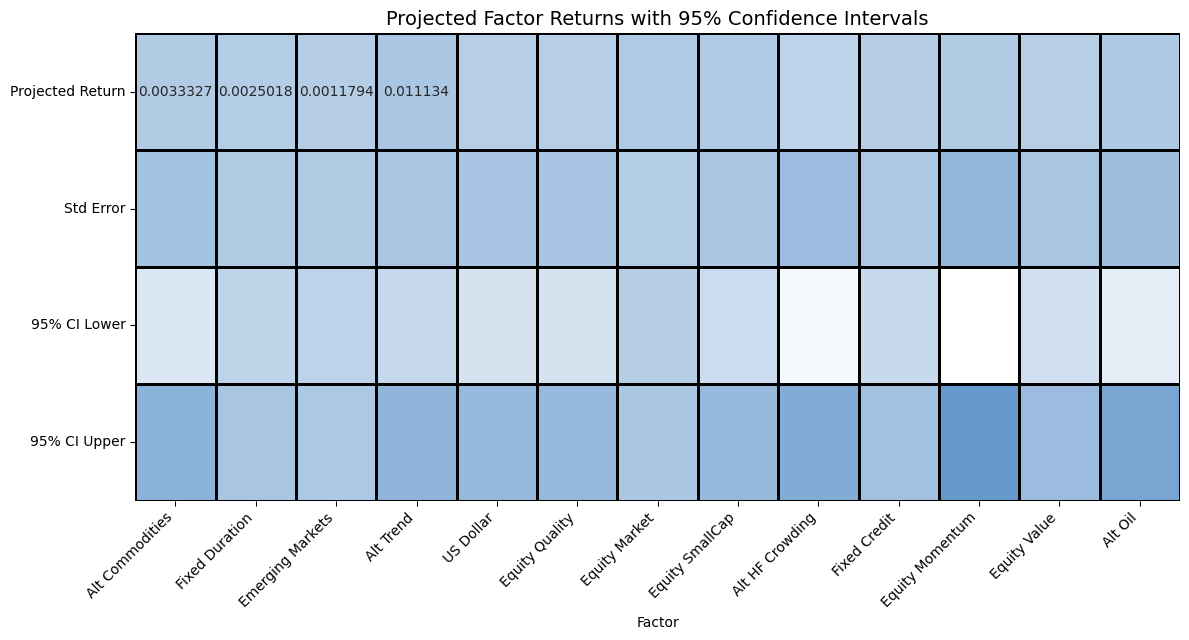

CSV file saved at: projected_returns_with_confidence_intervals.csv


In [7]:
# Import necessary libraries for calculations and styling the table
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

# Load the data from the uploaded file
file_path = '/Users/asheth/Library/CloudStorage/OneDrive-iCapitalNetwork/Git/FactorPrediction/PNCI/Aniket/twostep_projection_MSE.csv'
projected_returns = pd.read_csv(file_path)

# Calculating 95% confidence intervals
confidence_level = 0.95
alpha = 1 - confidence_level
degrees_freedom = len(projected_returns) - 1
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)

# Adding columns for standard errors and confidence intervals
projected_returns['Standard Error'] = projected_returns['2step_mse'].apply(lambda x: x**0.5)
projected_returns['CI Lower'] = projected_returns['2step_point_estimate'] - t_critical * projected_returns['Standard Error']
projected_returns['CI Upper'] = projected_returns['2step_point_estimate'] + t_critical * projected_returns['Standard Error']

# Renaming columns for clarity in the presentation
projected_returns.rename(columns={
    'Unnamed: 0': 'Factor',
    '2step_point_estimate': 'Projected Return',
    'Standard Error': 'Std Error',
    'CI Lower': '95% CI Lower',
    'CI Upper': '95% CI Upper'
}, inplace=True)

# Remove the 'MSE' column
projected_returns_final = projected_returns.drop(columns=['2step_mse'])

# Creating a custom color map for the table
cmap = LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#6699cc"], N=100)

# Plotting the styled table using Seaborn without the MSE column
plt.figure(figsize=(12, len(projected_returns_final) * 0.5))
sns.heatmap(projected_returns_final.set_index('Factor').T, annot=True, fmt=".5g", cmap=cmap, cbar=False, linewidths=1, linecolor='black')

# Adjustments for a clean table display
plt.title("Projected Factor Returns with 95% Confidence Intervals", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Writing the final table to CSV
csv_output_path = 'projected_returns_with_confidence_intervals.csv'
projected_returns_final.to_csv(csv_output_path, index=False)

print(f"CSV file saved at: {csv_output_path}")

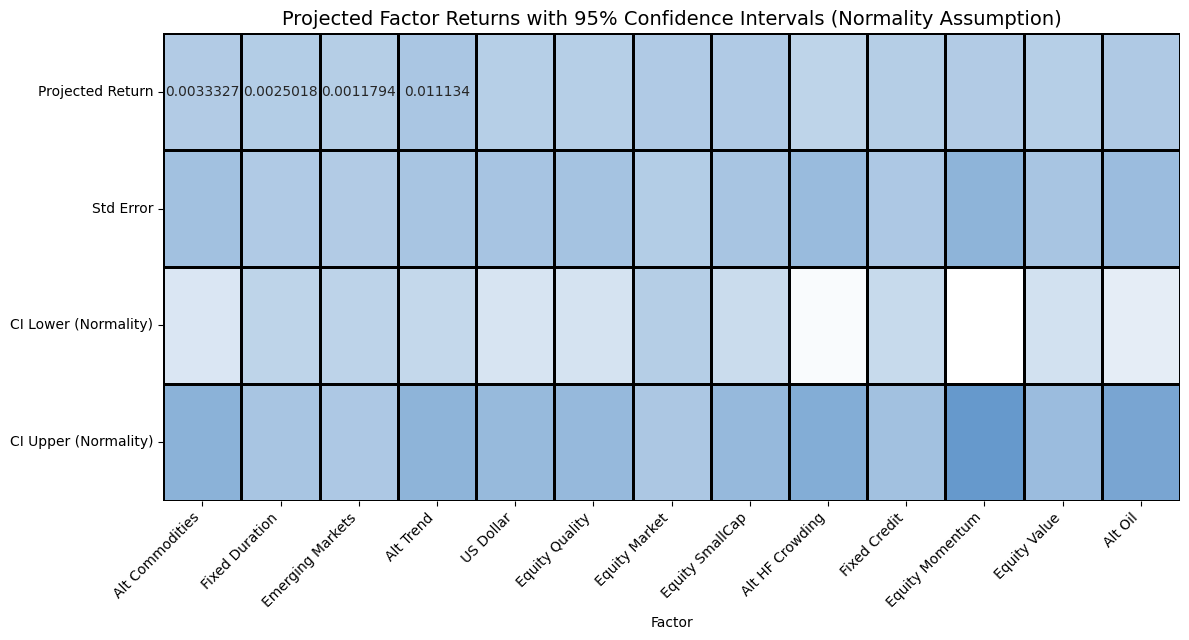

CSV file saved at: /Users/asheth/Library/CloudStorage/OneDrive-iCapitalNetwork/Git/FactorPrediction/PNCI/Aniket/projected_returns_with_confidence_intervals_normality.csv


In [9]:
# Import necessary libraries for calculations and styling the table
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

# Load the data from the uploaded file
file_path = '/Users/asheth/Library/CloudStorage/OneDrive-iCapitalNetwork/Git/FactorPrediction/PNCI/Aniket/twostep_projection_MSE.csv'
projected_returns = pd.read_csv(file_path)

# Calculating standard errors from MSE
projected_returns['Standard Error'] = projected_returns['2step_mse'].apply(lambda x: x**0.5)

# 95% Confidence Interval using Z-distribution (Normality assumption)
z_critical = stats.norm.ppf(1 - 0.05/2)

projected_returns['CI Lower (Normality)'] = projected_returns['2step_point_estimate'] - z_critical * projected_returns['Standard Error']
projected_returns['CI Upper (Normality)'] = projected_returns['2step_point_estimate'] + z_critical * projected_returns['Standard Error']

# Renaming columns for clarity in the presentation
projected_returns.rename(columns={
    'Unnamed: 0': 'Factor',
    '2step_point_estimate': 'Projected Return',
    'Standard Error': 'Std Error'
}, inplace=True)

# Drop the 'MSE' column for display purposes
projected_returns_final = projected_returns.drop(columns=['2step_mse'])

# Creating a custom color map for the table
cmap = LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#6699cc"], N=100)

# Plotting the styled table using Seaborn
plt.figure(figsize=(12, len(projected_returns_final) * 0.5))
sns.heatmap(projected_returns_final.set_index('Factor').T, annot=True, fmt=".5g", cmap=cmap, cbar=False, linewidths=1, linecolor='black')

# Adjustments for a clean table display
plt.title("Projected Factor Returns with 95% Confidence Intervals (Normality Assumption)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Writing the final table to CSV
csv_output_path = '/Users/asheth/Library/CloudStorage/OneDrive-iCapitalNetwork/Git/FactorPrediction/PNCI/Aniket/projected_returns_with_confidence_intervals_normality.csv'
projected_returns_final.to_csv(csv_output_path, index=False)

print(f"CSV file saved at: {csv_output_path}")